# Analyze time complexity

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from cissir import visualization as viz
from cissir.utils import res_path
import numpy as np

viz.paper_style(line_cycler=False)

In [2]:
res_df = pd.DataFrame()
for f in res_path.rglob("*cb_results*.csv"):
    f_df = pd.read_csv(f, index_col=0)
    res_df = pd.concat([res_df, f_df])
if np.any(res_df.duplicated()):
    print("Warning, duplicated rows!")

In [3]:
print(f"Data columns: {*res_df.columns,}")
print(f"SI path type: {*res_df['si_taps'].unique(),}")
print(f"Opt methods : {*res_df['opt'].unique(),}")

Data columns: ('si_tgt', 'opt', 'rx_sdr_err', 'tx_sdr_err', 'si_opt', 'tx_loss', 'rx_loss', 'elapsed_time', 'si_sdr', 'tx_loss_sdr', 'rx_loss_sdr', 'si_full', 'phased', 'si_taps', 'num_beams', 'loss_tgt')
SI path type: (1, 'full')
Opt methods : ('cissir', 'lonestar')


In [4]:
time_df = res_df.assign(method=res_df.opt + ", phased:" + res_df.phased.astype(str)).query("opt != 'socp'").reset_index()

time_df.loc[time_df.opt == "lonestar", ["phased"]] = True
time_grp = time_df.groupby(["opt", "phased", "si_taps"])["elapsed_time"]
msec_df = pd.DataFrame({"Q1": time_grp.quantile(0.25), "Q2": time_grp.quantile(0.5),
                        "Q3": time_grp.quantile(0.75), "avg": time_grp.mean()}) * 1000
msec_df.round(2)

Q1       Q2       Q3      avg
opt      phased si_taps                                    
cissir   False  1           6.28     7.09     7.53     6.87
                full        4.47     7.85     8.24     6.70
         True   1        1216.80  1380.04  1484.44  1387.75
                full     1098.33  1296.12  1350.77  1254.93
lonestar True   1         149.35   222.32  1206.70  1637.41

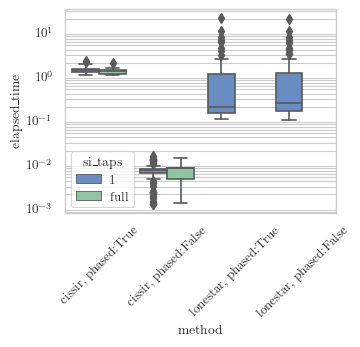

In [5]:
ax = sns.boxplot(time_df, x="method", y="elapsed_time", hue="si_taps")
plt.xticks(rotation=45)
ax.set(yscale="log")
ax.yaxis.grid(which="both")

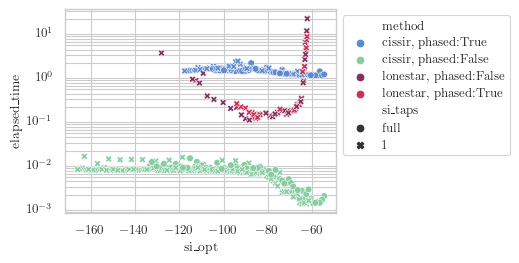

In [6]:
ax = sns.scatterplot(time_df.sample(frac=1), x="si_opt", y="elapsed_time", hue="method", style="si_taps")
ax.set(yscale="log")
ax.yaxis.grid(which="both")
_ = ax.legend(loc="upper left", bbox_to_anchor=(1, 1))